# Pharmaceutical Data




In [1]:
import pandas as pd

pharm = pd.read_csv(r'D:\Mitsu\MS-ISM\508 - Data Mining I\Week2\Pharmaceuticals.csv')

In [2]:
pharm.head(5)

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [3]:
pharm.dtypes

Symbol                    object
Name                      object
Market_Cap               float64
Beta                     float64
PE_Ratio                 float64
ROE                      float64
ROA                      float64
Asset_Turnover           float64
Leverage                 float64
Rev_Growth               float64
Net_Profit_Margin        float64
Median_Recommendation     object
Location                  object
Exchange                  object
dtype: object

In [4]:
#X= pharm.iloc[:, 2:11].values

In [5]:
X= pharm.iloc[:, 5].values
#X= [X]
X = X.reshape(-1, 1)
print(X)

[[26.4]
 [12.9]
 [14.9]
 [27.4]
 [21.8]
 [ 3.9]
 [34.8]
 [24.1]
 [15.1]
 [31. ]
 [62.9]
 [21.4]
 [28.6]
 [11.2]
 [40.6]
 [17.9]
 [45.6]
 [13.5]
 [22.6]
 [10.2]
 [54.9]]


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
pharm_std = scaler.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]

for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init ='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(pharm_std)
    wcss.append(kmeans.inertia_)

In [10]:
import matplotlib.pyplot as plt

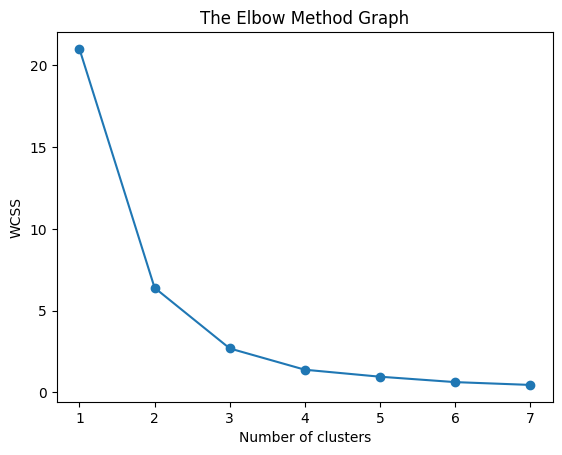

In [11]:
plt.plot(range(1,8),wcss, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
km = KMeans(n_clusters=2, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0).fit(X)
km.cluster_centers_

array([[47.76   ],
       [18.93125]])

In [13]:
clusters = km.fit_predict(X)

pharm['label'] = clusters

In [14]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['ROE'])

# centroids = pd.DataFrame(km.cluster_centers_, columns = ['Annual Income (k$)','Spending Score (1-100)'])
# centroids

In [15]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

C:\Users\Mitsu\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\misc.py:424: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x[0], x[-1])


<Figure size 1000x600 with 0 Axes>

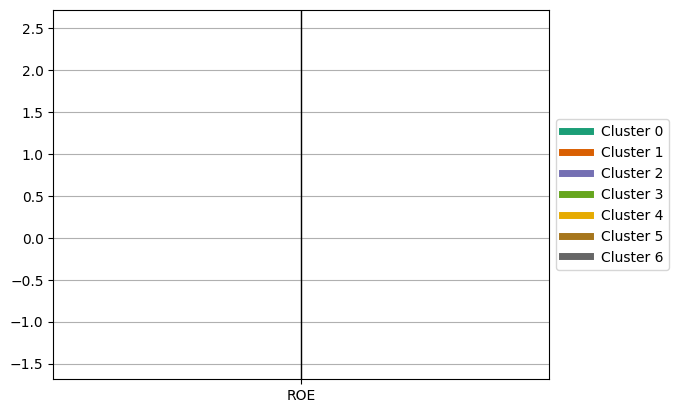

<Figure size 1000x600 with 0 Axes>

In [17]:
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(10,6))

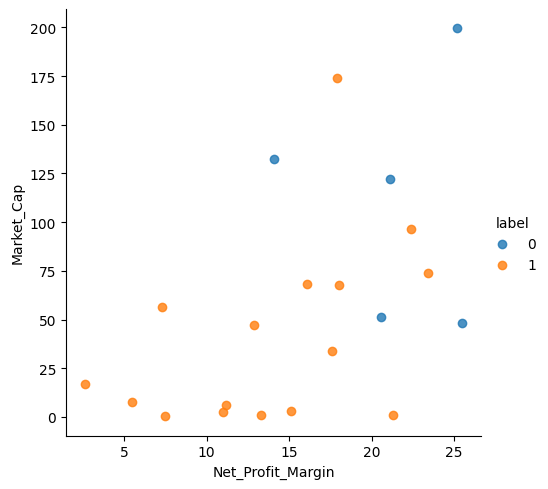

In [18]:
import seaborn as sns

sns.lmplot(data= pharm, y= 'Market_Cap', x='Net_Profit_Margin', hue= 'label',fit_reg = False, legend = True)